In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data: noisy sine wave

In [2]:
def generate_series(size=500):
    x = np.linspace(0, 50, size)
    y = np.sin(x) + np.random.normal(scale=0.1, size=size)
    return y.astype(np.float32)
 
series = generate_series()

# Normalize the series

In [3]:
series = (series - np.mean(series)) / np.std(series)

# Create input-output sequence pairs

In [4]:
def create_dataset(series, window_size=30):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X)[..., np.newaxis], np.array(y)
 
window_size = 30
X, y = create_dataset(series, window_size)

# Split into training and test sets

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build Conv1D model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(window_size, 1)),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1)
])

# Compile and train

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9160 - val_loss: 0.8536
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8093 - val_loss: 0.7316
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6454 - val_loss: 0.5546
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4699 - val_loss: 0.3622
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3027 - val_loss: 0.2016
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1603 - val_loss: 0.1002
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0725 - val_loss: 0.0348
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0255 - val_loss: 0.0270
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0211 - val_loss: 0.0291
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0274 - val_loss: 0.0310


# Predict on test set

In [8]:
preds = model.predict(X_test[:100]).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


# Plot predictions

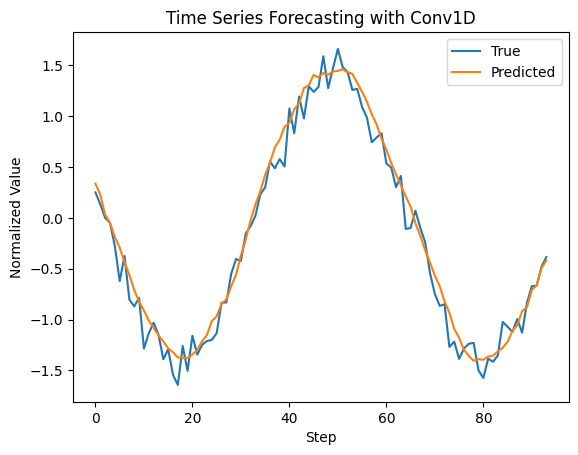

In [9]:
plt.plot(y_test[:100], label='True')
plt.plot(preds, label='Predicted')
plt.title("Time Series Forecasting with Conv1D")
plt.xlabel("Step")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()